In [6]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov  3 22:08:20 2021

@author: Rajesh
"""
import random
import numpy as np
from abc import ABC, abstractmethod
from matplotlib import pyplot as plt

class AbstractClass:
    
    @abstractmethod
    
    def transmitter (self, data):
        pass
    def receiver (self, rec_data):
        pass
    def channel (self, trans_data):
        pass    
    

In [7]:
class bpsk (AbstractClass):
    
    
    def __init__(self, data_type, n):
        #self.__data = 0  # make the data private
        self.data_type = data_type
        self. n = n
        self.trans_data = 0
        self.snrdb = 0
    
    
    def data_generator (data_type, n):
        '''

        Parameters
        ----------
        data_type : type of data
            image or bits
        n : number of bits


        Returns
        -------
        list
            list of data stream

        '''
        if data_type=="bits":
            return [random.randint(0, 1) for i in range (n)]
        else:
            pass # add the code generate image data
    

        
    def transmitter (self):
        self.__data = np.array(data_generator(self.data_type, self.n)) 
        self.__data = 2*self.__data-1 # bit mapping
        print (f"Transmitted data : {self.__data}")
        
        
    def channel (self, snrdb):
        self.snrdb = snrdb
        snr_norm = 10**(self.snrdb/10)
        p = snr_norm**0.5
        self.noise = np.random.randn(len(self.__data)) 
        self.__trans_data = p*self.__data + self.noise
        #return self.trans_data
    
    
    def receiver (self):
        '''
        mask = (self.trans_data >0)
        detected_data = self.trans_data[mask]
        '''
        self.__detected_data = np.zeros (len(self.__data))
        for i in range (len(self.__trans_data)):
            if (self.__trans_data[i] > 0):
                self.__detected_data[i] = 1
            else:
                self.__detected_data[i] = 0
        print(self.__detected_data)
        
        
    def plotting (self):
        Tb = 1 # T
        Eb = 1
        fc = 1/Tb
        t = np.linspace (0, 1, 1000)
        
        # plotting the transmitted data
        phi = np.sqrt(2*Eb/Tb)*np.sin(2*np.pi*fc*t)
        trans_wave = np.empty([0, len(self.__trans_data)])
        for i in range (len(self.__trans_data)):
            trans_wave = np.append(trans_wave, self.__data[i]*phi )
            
        plt.plot (range(len(t)*len(self.__trans_data)), trans_wave)
        plt.show()
        
        # plotting the detected wave
        phi = np.sqrt(2*Eb/Tb)*np.sin(2*np.pi*fc*t)
        detected_wave = np.empty([0, len(self.__trans_data)])
        self.__detected_data = 2*self.__detected_data-1
        for i in range (len(self.__detected_data)):
            detected_wave = np.append(detected_wave, self.__detected_data[i]*phi )
        print(len(phi))
        plt.plot (range(len(t)*len(self.__detected_data)), detected_wave)
        plt.show()
        
        for i in range (self.n):
            if (self.__data[i] > 0):
                self.__data[i] = 1
            else:
                self.__data[i] = 0
        
        for i in range (self.n):
            if (self.__detected_data[i] > 0):
                self.__detected_data[i] = 1
            else:
                self.__detected_data[i] = 0
            
        self.__detected_data = (self.__detected_data).astype('int')
        error_bits = self.__data^self.__detected_data
        print (error_bits)
        ber = sum(error_bits)/(self.n)
        print (f"Ber : {ber}\tsnr : {self.snrdb}")
        return ber
        
        
    def ber_vs_snr(self):
        ber = np.zeros(20)
        for i in range (20):
            b.transmitter()
            y = b.channel(i)
            b.receiver()
            ber[i] = b.plotting()
            
        plt.semilogy(np.arange(20),ber,color='r',marker='o',linestyle='-')
        
        
    
      

Transmitted data : [-1 -1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1
 -1  1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1
 -1  1  1  1  1 -1 -1 -1 -1  1  1  1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1
  1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1
  1 -1 -1  1 -1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1
  1 -1  1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1
  1  1  1 -1 -1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1  1 -1  1  1  1  1
  1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1
  1  1  1  1  1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1 -1  1 -1 -1
  1  1 -1 -1  1 -1  1 -1  1  1 -1  1 -1  1  1 -1  1  1 -1 -1  1  1 -1  1
 -1  1  1  1 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1  1  1 -1  1  1
 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1  1  1
  1  1  1 -1  1 -1  1  1  1  1  1  1 -1  1 -1  1 -1 -1  1  1  1  1  1  1
  1  1 -1 -1  1  1  1  1  1 -1  

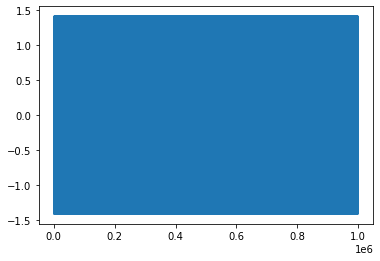

1000


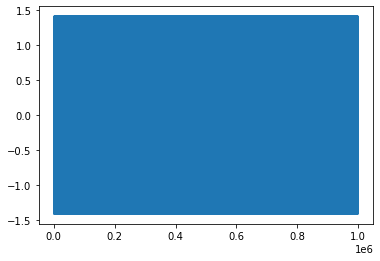

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 

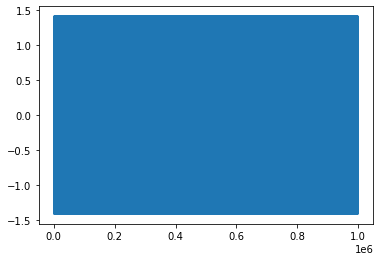

1000


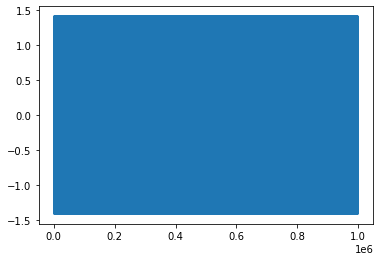

[0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

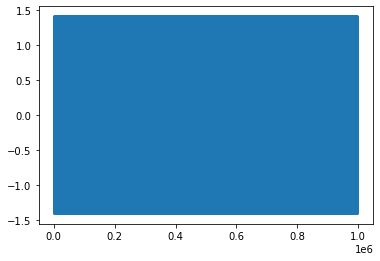

1000


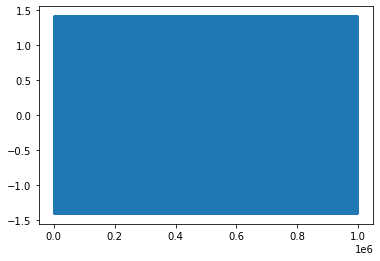

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 

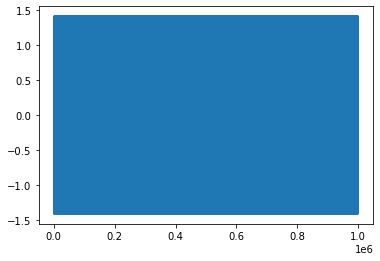

1000


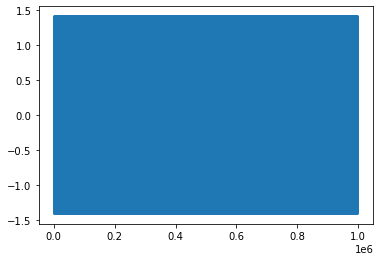

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 

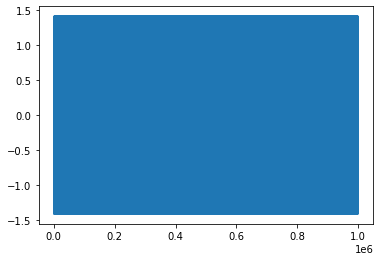

1000


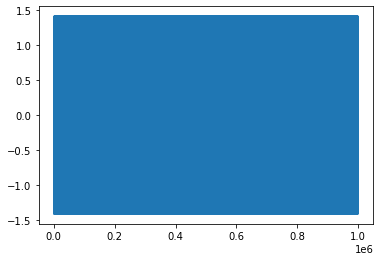

[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

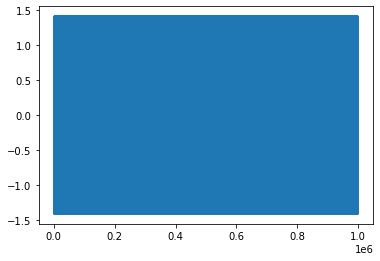

1000


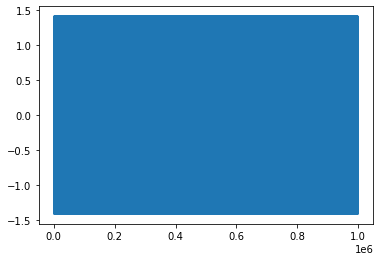

[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 

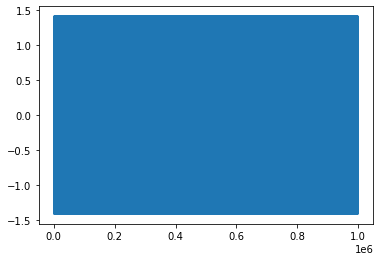

1000


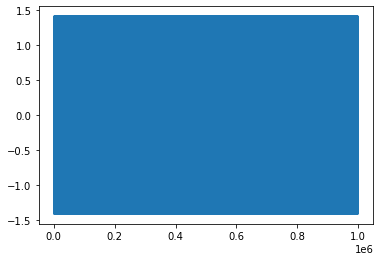

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 

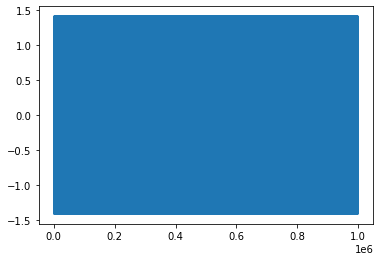

1000


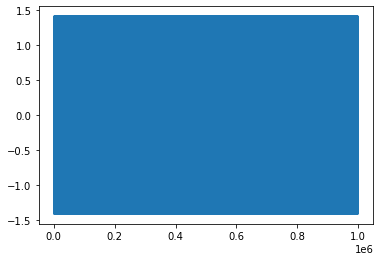

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

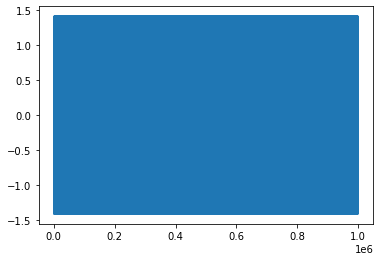

1000


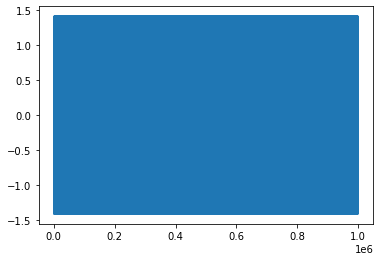

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

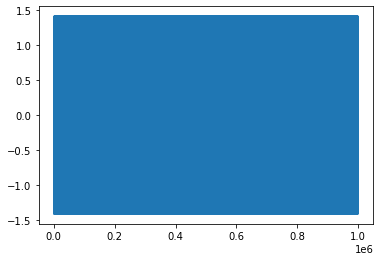

1000


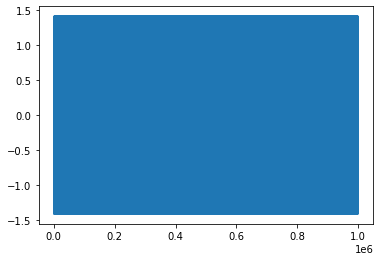

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

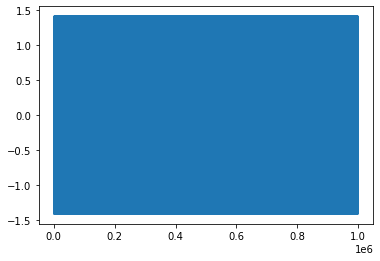

1000


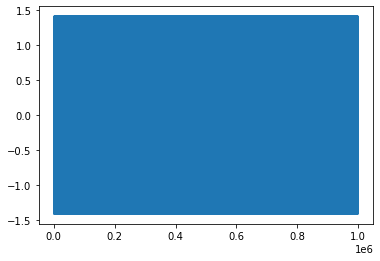

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

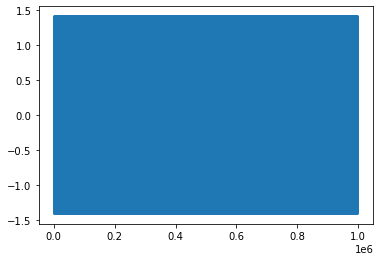

1000


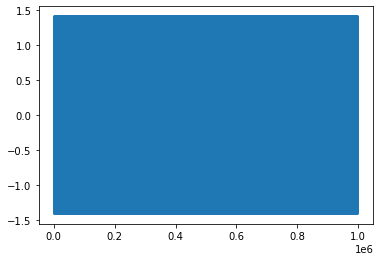

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

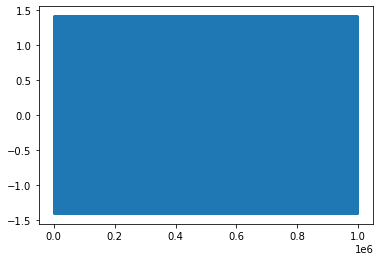

1000


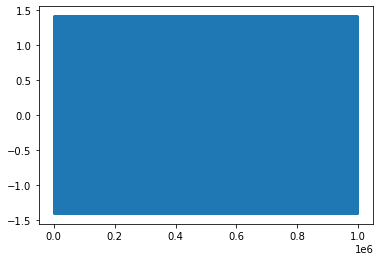

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

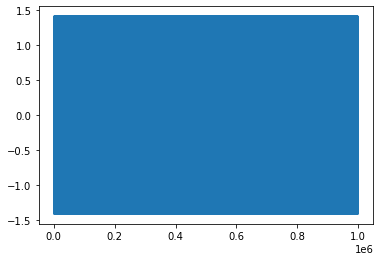

1000


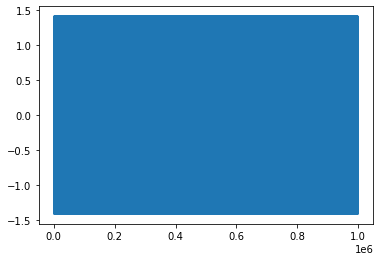

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

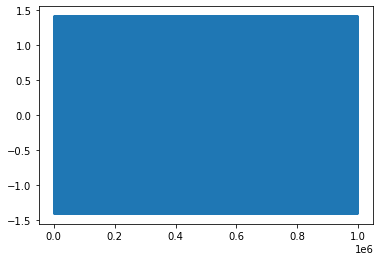

1000


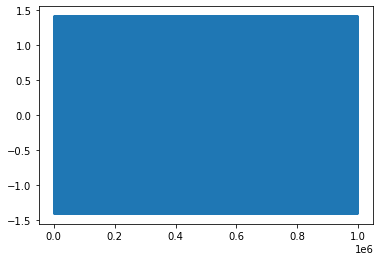

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

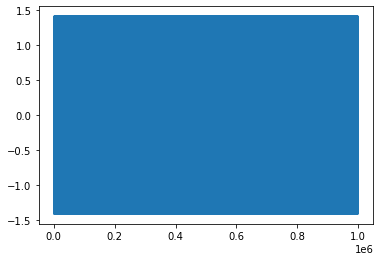

1000


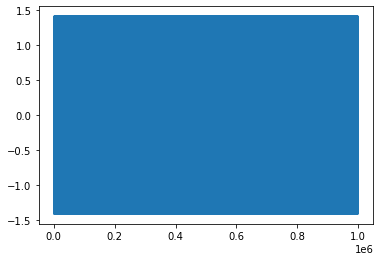

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

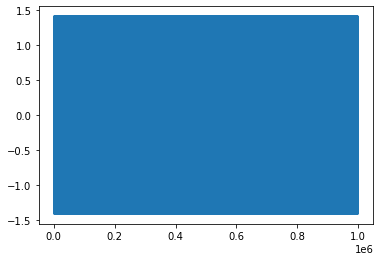

1000


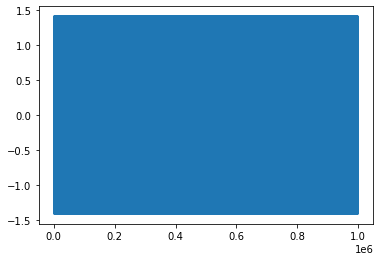

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

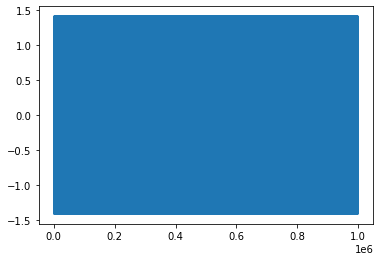

1000


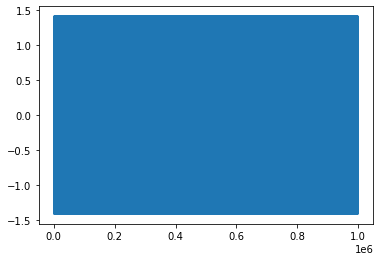

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

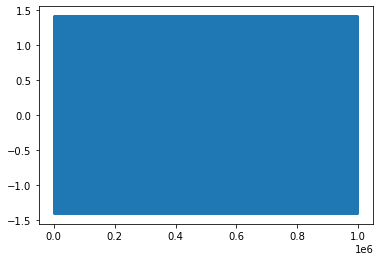

1000


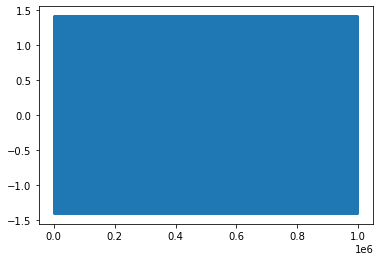

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

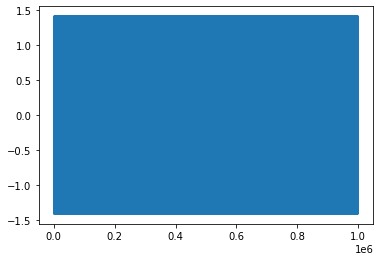

1000


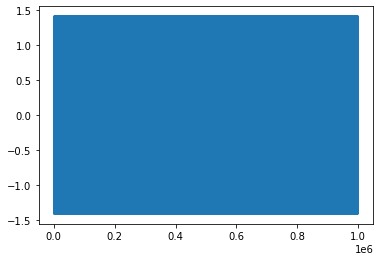

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

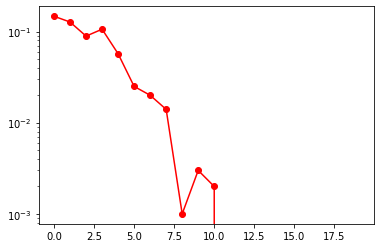

In [275]:
b = bpsk("bits", 1000)
'''
b.transmitter()
y = b.channel(2)
b.receiver()
b.plotting()'''
b.ber_vs_snr()



In [8]:
class psk16 (AbstractClass):
    
    
    def __init__(self, data_type, n):
        #self.__data = 0  # make the data private
        self.data_type = data_type
        self.n = n
        self.trans_data = 0
        self.snrdb = 0
        self.beta    = 1.76537;
        self.a       = sqrt(2/(1+beta^2));
        self.rl      = a;
        self.rh      = rl*beta;
        self.nsig_sq = 1/snr;

        self.th  = (rh + rl)/2;
        self.cth = th * ( 1+tand(22.5) );
    
    def data_generator (data_type, n):
        '''

        Parameters
        ----------
        data_type : type of data
            image or bits
        n : number of bits


        Returns
        -------
        list
            list of data stream

        '''
        if data_type=="bits":
            l = zeros (n/4)
            for i in range(n/4)
                l[i] = complex(np.cos(i*np.pi/4), np.sini*(np.pi/4))
            return [random.randint(0, 1) for i in range (n)]
        else:
            pass # add the code generate image data
    

        
    def transmitter (self):
        self.__data = np.array(data_generator(self.data_type, self.n))
        
        #print (f"Transmitted data : {self.__data}")
        
        
    def channel (self, snrdb):
        self.snrdb = snrdb
        snr_norm = 10**(self.snrdb/10)
        p = snr_norm**0.5
        self.noise = np.random.randn(len(self.__data)) 
        self.__trans_data = p*self.__data + self.noise
        #return self.trans_data
    
    
    def receiver (self):
        '''
        mask = (self.trans_data >0)
        detected_data = self.trans_data[mask]
        '''
        self.__detected_data = np.zeros (len(self.__data))
        for i in range (len(self.__trans_data)):
            if (self.__trans_data[i] > 0):
                self.__detected_data[i] = 1
            else:
                self.__detected_data[i] = 0
        print(self.__detected_data)
        
        
    def plotting (self):
        Tb = 1 # T
        Eb = 1
        fc = 1/Tb
        t = np.linspace (0, 1, 1000)
        
        # plotting the transmitted data
        phi = np.sqrt(2*Eb/Tb)*np.sin(2*np.pi*fc*t)
        trans_wave = np.empty([0, len(self.__trans_data)])
        for i in range (len(self.__trans_data)):
            trans_wave = np.append(trans_wave, self.__data[i]*phi )
            
        
        plt.plot (range(len(t)*len(self.__trans_data)), trans_wave)
        plt.show()
        
        # plotting the detected wave
        phi = np.sqrt(2*Eb/Tb)*np.sin(2*np.pi*fc*t)
        detected_wave = np.empty([0, len(self.__trans_data)])
        self.__detected_data = 2*self.__detected_data-1
        for i in range (len(self.__detected_data)):
            detected_wave = np.append(detected_wave, self.__detected_data[i]*phi )
        print(len(phi))
        plt.plot (range(len(t)*len(self.__detected_data)), detected_wave)
        plt.show()
        
        for i in range (self.n):
            if (self.__data[i] > 0):
                self.__data[i] = 1
            else:
                self.__data[i] = 0
        
        for i in range (self.n):
            if (self.__detected_data[i] > 0):
                self.__detected_data[i] = 1
            else:
                self.__detected_data[i] = 0
            
        self.__detected_data = (self.__detected_data).astype('int')
        error_bits = self.__data^self.__detected_data
        print (error_bits)
        ber = sum(error_bits)/(self.n)
        print (f"Ber : {ber}\tsnr : {self.snrdb}")
        return ber
        
        
    def ber_vs_snr(self):
        ber = np.zeros(20)
        for i in range (20):
            b.transmitter()
            y = b.channel(i)
            b.receiver()
            ber[i] = b.plotting()
            
        plt.semilogy(np.arange(20),ber,color='r',marker='o',linestyle='-')
        
        
    
      

SyntaxError: invalid syntax (Temp/ipykernel_17816/985049980.py, line 37)

In [ ]:
# mapping the data to symbols
    for i = 1:4:self.n
         if     (self.__data(i) == 0 && self.__data(i+1) == 0 && self.__data(i+2) == 0 && self.__data(i+3) == 0)
             mappedSymbols(s) = rl*(cos(0) + 1i*sin(0));
         elseif (self.__data(i) == 0 && self.__data(i+1) == 0 && self.__data(i+2) == 0 && self.__data(i+3) == 1)
             mappedSymbols(s) = rl*(cos(pi/4) + 1i*sin(pi/4));
         elseif (self.__data(i) == 0 && self.__data(i+1) == 0 && self.__data(i+2) == 1 && self.__data(i+3) == 1)
             mappedSymbols(s) = rl*(cos(pi/2) + 1i*sin(pi/2));
         elseif (self.__data(i) == 0 && self.__data(i+1) == 1 && self.__data(i+2) == 1 && self.__data(i+3) == 1)
             mappedSymbols(s) = rl*(cos(3*pi/4) + 1i*sin(3*pi/4));
         elseif (self.__data(i) == 0 && self.__data(i+1) == 1 && self.__data(i+2) == 0 && self.__data(i+3) == 1)
             mappedSymbols(s) = rl*(cos(pi) + 1i*sin(pi));
         elseif (self.__data(i) == 0 && self.__data(i+1) == 1 && self.__data(i+2) == 0 && self.__data(i+3) == 0)
             mappedSymbols(s) = rl*(cos(5*pi/4) + 1i*sin(5*pi/4));
         elseif (self.__data(i) == 0 && self.__data(i+1) == 1 && self.__data(i+2) == 1 && self.__data(i+3) == 0)
             mappedSymbols(s) = rl*(cos(3*pi/2) + 1i*sin(3*pi/2));
         elseif (self.__data(i) == 0 && self.__data(i+1) == 0 && self.__data(i+2) == 1 && self.__data(i+3) == 0)
             mappedSymbols(s) = rl*(cos(7*pi/4) + 1i*sin(7*pi/4));
        
         elseif (data(i) == 1 && data(i+1) == 0 && data(i+2) == 0 && data(i+3) == 0)
             mappedSymbols(s) = rh*(cos(0) + 1i*sin(0));
         elseif (data(i) == 1 && data(i+1) == 0 && data(i+2) == 0 && data(i+3) == 1)
             mappedSymbols(s) = rh*(cos(pi/4) + 1i*sin(pi/4));
         elseif (data(i) == 1 && data(i+1) == 0 && data(i+2) == 1 && data(i+3) == 1)
             mappedSymbols(s) = rh*(cos(pi/2) + 1i*sin(pi/2));
         elseif (data(i) == 1 && data(i+1) == 1 && data(i+2) == 1 && data(i+3) == 1)
             mappedSymbols(s) = rh*(cos(3*pi/4) + 1i*sin(3*pi/4));
         elseif (data(i) == 1 && data(i+1) == 1 && data(i+2) == 0 && data(i+3) == 1)
             mappedSymbols(s) = rh*(cos(pi) + 1i*sin(pi));
         elseif (data(i) == 1 && data(i+1) == 1 && data(i+2) == 0 && data(i+3) == 0)
             mappedSymbols(s) = rh*(cos(5*pi/4) + 1i*sin(5*pi/4));
         elseif (data(i) == 1 && data(i+1) == 1 && data(i+2) == 1 && data(i+3) == 0)
             mappedSymbols(s) = rh*(cos(3*pi/2) + 1i*sin(3*pi/2));
         elseif (data(i) == 1 && data(i+1) == 0 && data(i+2) == 1 && data(i+3) == 0)
             mappedSymbols(s) = rh*(cos(7*pi/4) + 1i*sin(7*pi/4));
         end 
         s = s+1;
    end 

In [29]:
#l = complex(np.zeros (int(20/4)), np.zeros (int(20/4)))
#np.cos(i*np.pi/4) + np.sin(i*(np.pi/4))
pos_sym=[] # stores all possible symbols of 16 PSK scheme
for i in range(16):
    pos_sym=np.append(l,complex(np.cos(i*2*np.pi/16) , np.sin(i*2*np.pi/16)))
    
   # plt.scatter(np.cos(i*2*np.pi/16),np.cos(i*2*np.pi/16))

print(l)

[ 1.00000000e+00+0.00000000e+00j  9.23879533e-01+3.82683432e-01j
  7.07106781e-01+7.07106781e-01j  3.82683432e-01+9.23879533e-01j
  6.12323400e-17+1.00000000e+00j -3.82683432e-01+9.23879533e-01j
 -7.07106781e-01+7.07106781e-01j -9.23879533e-01+3.82683432e-01j
 -1.00000000e+00+1.22464680e-16j -9.23879533e-01-3.82683432e-01j
 -7.07106781e-01-7.07106781e-01j -3.82683432e-01-9.23879533e-01j
 -1.83697020e-16-1.00000000e+00j  3.82683432e-01-9.23879533e-01j
  7.07106781e-01-7.07106781e-01j  9.23879533e-01-3.82683432e-01j]


In [33]:
np.cos(np.pi/2)

6.123233995736766e-17

In [82]:
class am (AbstractClass):
    
    
    def __init__(self):
        #self.__data = 0  # make the data private
        print ("To prevent overmodulation, enter Ac > Am.")
        self.Am = float(input("Enter the amplitude of message : "))
        self.fm = float(input("Enter the frequency of sinusoidal msg signal : "))

        self.fc = float(input("Enter the carrier frequency : "))
        self.Ac = float(input("Enter the carrier amplitude : "))
        self.car_wave = []
        self.__msg_wave = []
    
    def data_generator (self):    
        if (self.Am > self.Ac):
                print ("Overmodulation")
        elif (self.Am < self.Ac):
                print ("Undermodulation")
        else:
                print ("Am = Ac")
        
        t = np.linspace (0, 1, 1000)     #time interval

        self.car_wave[:] = self.Ac * np.cos(2*np.pi*self.fc*t)
        self.__msg_wave[:] = self.Am * np.cos(2*np.pi*self.fm*t)
        
        ################
        #print (self.__msg_wave)
        #plt.plot (t,self.__msg_wave)
        
        #plt.show()
        ###################
        
    def transmitter (self):
        mod_index = self.Am / self.Ac
        t = np.linspace (0, 1, 1000)
        self.data_generator()
        self.__data = self.Ac * (1 + mod_index*np.cos(2*np.pi*self.fm*t)) * self.Ac*np.cos (2*np.pi*self.fc*t)
        
        ############
        
        #print (self.__data)
        #plt.plot (t,self.__data)
        #plt.show()
        #print (f"Transmitted data : {self.__data}")
        
        
    def channel (self, snrdb):
        self.snrdb = snrdb
        snr_norm = 10**(self.snrdb/10)
        p = snr_norm**0.5
        self.noise = np.random.randn(len(self.__data)) 
        self.__trans_data = p*self.__data + self.noise
        #return self.trans_data
    
    
    def receiver (self):
        '''
        mask = (self.trans_data >0)
        detected_data = self.trans_data[mask]
        '''
        self.__detected_data = np.zeros (len(self.__data))
        for i in range (len(self.__trans_data)):
            if (self.__trans_data[i] > 0):
                self.__detected_data[i] = 1
            else:
                self.__detected_data[i] = 0
        print(self.__detected_data)
        
        
    def plotting (self):
        
        t = np.linspace (0, 1, 1000)
        
        # plotting the message wave
        plt.plot (t,self.__msg_wave, label = "Message wave")
        plt.title ("Amplitude Modulation")
        plt.xlabel ("t")
        plt.ylabel ("Amplitude")
        plt.legend (loc = 1)
        plt.show()
        
        # plotting the carrier wave
        plt.plot (t,self.car_wave, label = "Carrier wave")
        plt.title ("Amplitude Modulation")
        plt.xlabel ("t")
        plt.ylabel ("Amplitude")
        plt.legend (loc = 1)
        plt.show()
        
        # plotting the modulated wave
        plt.plot (t,self.__data, label = "Modulated wave")
        plt.title ("Amplitude Modulation")
        plt.xlabel ("t")
        plt.ylabel ("Amplitude")
        plt.legend (loc = 1)
        plt.show()
        
        
    

To prevent overmodulation, enter Ac > Am.
Enter the amplitude of message : 2
Enter the frequency of sinusoidal msg signal : 5
Enter the carrier frequency : 50
Enter the carrier amplitude : 5
Undermodulation


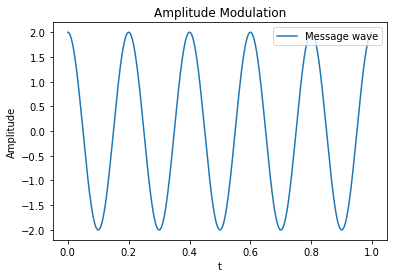

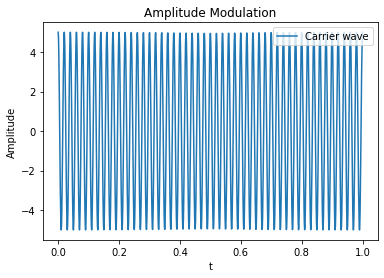

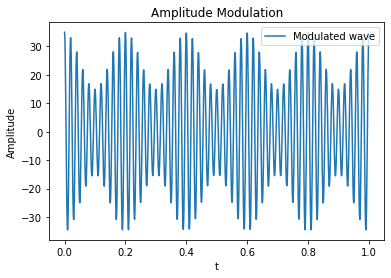

In [84]:
a = am()
a.transmitter()
a.plotting()

Undermodulation
[1.0, 0.9998219965624732, 0.99928804962034, 0.9983983492623831, 0.9971532122280464, 0.9955530817946746, 0.9935985276197029, 0.9912902455378554, 0.9886290573134227, 0.9856159103477085, 0.9822518773417481, 0.9785381559144196, 0.9744760681760832, 0.9700670602579008, 0.9653127017970033, 0.9602146853776895, 0.9547748259288535, 0.9489950600778587, 0.9428774454610842, 0.9364241599913923, 0.9296375010827771, 0.9225198848324687, 0.915073845160786, 0.9073020329090443, 0.8992072148958368, 0.8907922729320283, 0.8820602027948115, 0.8730141131611882, 0.8636572245012606, 0.8539928679317208, 0.8440244840299503, 0.8337556216091515, 0.8231899364549453, 0.812331190023886, 0.8011832481043575, 0.789750079440326, 0.7780357543184395, 0.766044443118978, 0.7537804148311694, 0.7412480355334002, 0.7284517668388609, 0.7153961643071819, 0.7020858758226226, 0.6885256399393922, 0.6747202841946925, 0.6606747233900815, 0.6463939578417692, 0.6318830716004721, 0.6171472306414553, 0.6021916810254095, 0.58

In [65]:
a.car_wave


[5.0,
 4.99841778373267,
 4.993672136294003,
 4.985766061140232,
 4.974704561919644,
 4.960494639305843,
 4.9431452865671135,
 4.92266748387471,
 4.899074191353647,
 4.872380340880416,
 4.842602826632799,
 4.809760494397774,
 4.773874129644268,
 4.734966444368316,
 4.693062062718947,
 4.648187505413885,
 4.600371172954957,
 4.549643327653784,
 4.496036074479184,
 4.439583340738365,
 4.380320854604792,
 4.318286122506303,
 4.2535184053878075,
 4.186058693863553,
 4.115949682274726,
 4.043235741668775,
 3.9679628917175744,
 3.890178771592198,
 3.8099326098127255,
 3.727275193092181,
 3.6422588341943047,
 3.5549373388255114,
 3.465365971581986,
 3.373601420973463,
 3.2797017635458388,
 3.183726427125303,
 3.0857361532072765,
 2.9857929585139313,
 2.8839600957446483,
 2.780302013544238,
 2.6748843157142588,
 2.567773719693258,
 2.4590380143322093,
 2.3487460169918544,
 2.2369675299891343,
 2.12377329642024,
 2.009234955388256,
 1.8934249966637504,
 1.7764167148069687,
 1.6582841627806955,
